# Lab 05: Final Code - Demo

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import time
import utils

### Download the data

In [2]:
data_path = "/Users/dongdongdongdong/Desktop/data/mnist"

train_data = torch.load(data_path + "/train_data.pt")
train_label = torch.load(data_path + "/train_label.pt")
test_data = torch.load(data_path + "/test_data.pt")
test_label = torch.load(data_path + "/test_label.pt")

### Make a ONE layer net class

In [3]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net, self).__init__()
        self.linear_layer = nn.Linear(input_size, output_size, bias=False)
        
    def forward(self, x):
        scores = self.linear_layer(x)
        return scores

### Build the net

In [4]:
net = one_layer_net(train_data.shape[1]*train_data.shape[2], 10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


In [5]:
utils.display_num_param(net)

There are 7840 (0.01 million) parameters in this neural network


### Choose the criterion, batchsize

In [6]:
criterion = nn.CrossEntropyLoss()
bs = 200

### Evaluate on test set

In [7]:
def eval_on_test_set():
    
    running_error = 0
    num_batches = 0
    
    for i in range(0, 10000, bs):
        minibatch_data = test_data[i : i+bs]
        minibatch_labels = test_label[i : i+bs]
        
        inputs = minibatch_data.view(bs, -1)
        scores = net(inputs)
        
        error = utils.get_error(scores, minibatch_labels)
        running_error += error.item()
        num_batches += 1
    
    total_error = running_error / num_batches
    print("Error rate on test set: {}%".format(total_error*100))

### Training loop

In [8]:
start = time.time()

lr = 0.05 # initial learning rate

for epoch in range(200):
    
    # learning rate strategy : divide the learning rate by 1.5 every 10 epochs
    if epoch % 10 == 0:
        lr = lr / 1.5
        
    # create a new optimizer at the beginning of each epoch: give the current learning rate
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    
    running_loss = 0
    running_error = 0
    num_batches = 0
    
    shuffled_indices = torch.randperm(60000)
    
    for i in range(0, 60000, bs):
        
        # forward and backward pass
        optimizer.zero_grad()
        
        indices = shuffled_indices[i : i+bs]
        minibatch_data = train_data[indices]
        minibatch_labels = train_label[indices]
        
        inputs = minibatch_data.view(bs, -1)
        inputs.requires_grad_()
        
        scores = net(inputs)
        loss = criterion(scores, minibatch_labels)
        loss.backward()
        optimizer.step()
        
        # compute some stats
        running_loss += loss.detach().item()
        error = utils.get_error(scores.detach(), minibatch_labels)
        running_error += error
        num_batches += 1
        
    # once the epoch is finished we divide the "running quantities"
    # by the number of batches
    total_loss = running_loss / num_batches
    total_error = running_error / num_batches
    elapsed_time = time.time() - start
    
    # every 10 epoch we display the stats 
    # and compute the error rate on the test set 
    if epoch % 10 == 0:
        print(" ")
        print("Epoch: {}, Time: {}, Loss: {}, Error: {}%, lr: {}".format(
            epoch, elapsed_time, total_loss, total_error*100, lr))
        

 
Epoch: 0, Time: 0.2553131580352783, Loss: 0.9564166595538457, Error: 19.045001983642578%, lr: 0.03333333333333333
 
Epoch: 10, Time: 2.1351370811462402, Loss: 0.3506368497014046, Error: 9.709997177124023%, lr: 0.022222222222222223
 
Epoch: 20, Time: 3.898437261581421, Loss: 0.3272425927221775, Error: 9.049994468688965%, lr: 0.014814814814814815
 
Epoch: 30, Time: 5.6762120723724365, Loss: 0.31805565088987353, Error: 8.851663589477539%, lr: 0.009876543209876543
 
Epoch: 40, Time: 7.457877159118652, Loss: 0.3133499799668789, Error: 8.711663246154785%, lr: 0.006584362139917695
 
Epoch: 50, Time: 9.222362279891968, Loss: 0.31062244166930514, Error: 8.630001068115234%, lr: 0.0043895747599451305
 
Epoch: 60, Time: 10.996838092803955, Loss: 0.30897445117433864, Error: 8.573330879211426%, lr: 0.0029263831732967535
 
Epoch: 70, Time: 12.820904970169067, Loss: 0.3079262979825338, Error: 8.548330307006836%, lr: 0.001950922115531169
 
Epoch: 80, Time: 14.852985143661499, Loss: 0.3072549794117609

### Choose an image at random from the test set and see how good/bad are the predictions

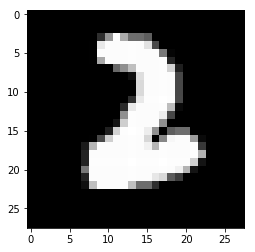

In [10]:
idx = randint(0, 10000-1)
im = test_data[idx]

utils.show(im)

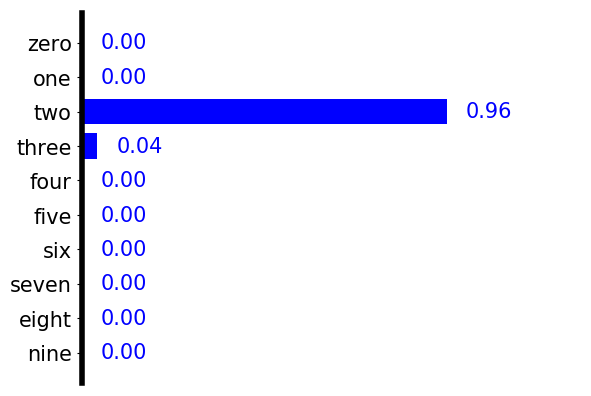

In [12]:
scores = net(im.view(1, -1))
probs = F.softmax(scores, dim=1)

utils.show_prob_mnist(probs)

In [13]:
test_label[idx]

tensor(2)